## SVD
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음
- SVD는 특이값 분해로 불리며 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며 모든 특이벡터는 서로 직교하는 성질을 갖는다.
- 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다.
- $\sum$이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다.
- A의 차원이 m x n일 때 U의 차원이 m x m, $\sum$의 차원이 m x n, $V^T$의 차원이 n X n으로 분해한다.

$$A = U \sum V^T$$

### SVD 개요

In [1]:
# numpy의 SVD 모듈 임포트
import numpy as np
from numpy.linalg import svd

## 4X4 random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


 SVD(Singular Value Decomposition)를 사용하여 행렬을 분해
 - SVD는 임의의 행렬 A를 세 개의 행렬 $U,Σ,V^T$
 로 분해합니다. 이를 통해 행렬의 구조를 분석하거나 차원을 축소할 수 있습니다.

In [2]:
# SVD 분해: U행렬, Sigma 행렬, V 전치 행렬을 반환
# Sigma 행렬은 0이 아닌 경우만 1차원 행렬로 표현
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))


(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


원본 행렬 복원
- 대각행렬 변환: np.diag 함수를 사용하여 Σ를 대각 행렬로 변환합니다. 이는 SVD의 복원 과정에서 필요합니다.
- 원본 행렬 복원: U, Σ(대각 행렬로 변환된), $V^T$를 곱하여 원본 행렬을 복원합니다.

In [10]:
# Sigma 를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
print('Dig_Sigma:\n\n',Sigma_mat,"\n\n")
a_=np.dot(np.dot(U,Sigma_mat),Vt)
print('Restored_A:\n\n',np.round(a_,3))

Dig_Sigma:

 [[3.4229581  0.         0.         0.        ]
 [0.         2.02287339 0.         0.        ]
 [0.         0.         0.46263157 0.        ]
 [0.         0.         0.         0.07935069]] 


Restored_A:

 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [13]:
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD
- Truncated SVD는 전체 SVD에서 상위 몇 개의 특이값 및 그에 대응하는 특이벡터들만을 사용하여 근사적인 행렬을 복원하는 방법입니다. Truncated SVD는 차원 축소와 데이터 압축에 유용합니다.
- 주로 데이터의 차원을 축소하여 계산 효율성을 높이고 노이즈를 제거하기 위해 사용됩니다.
- 상위 특이값만을 사용하면 데이터의 주요 구조를 유지하면서 차원을 줄일 수 있습니다.

In [15]:
# 다시 SVD 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
#print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
#print('V transpose matrix:\n', np.round(Vt, 3))


(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [22]:
# U행렬의 경우 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만을 추출
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
#V 전치 행렬의 경우는 앞 2행만 추출
Vt_=Vt[:2,:]
print(U_.shape, Sigma_.shape, Vt_.shape, "\n")
print('U_:\n\n',U_,'\n\nSigma_:\n\n',Sigma_,'\n\nVt_:\n\n',Vt_, "\n")
a_ = np.dot(np.dot(U_,Sigma_),Vt_)

print('Org_A:\n\n', np.round(a,3),"\n\n")
print('Restored_A:\n\n', np.round(a_,3))


(4, 2) (2, 2) (2, 4) 

U_:

 [[ 0.24568427  0.58278576]
 [-0.77441642 -0.01670951]
 [-0.52873215  0.56607625]
 [ 0.24568427  0.58278576]] 

Sigma_:

 [[2.66335286 0.        ]
 [0.         0.80703506]] 

Vt_:

 [[ 0.16449395 -0.57517122 -0.78233269 -0.17342252]
 [-0.67967123  0.19439734 -0.13178782 -0.69490191]] 

Org_A:

 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]] 


Restored_A:

 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- Truncated SVD를 이용한 행렬 분해 <br>
svd vs. svds
  - svd는 입력 행렬을 완전하게 분해하여 모든 특이값과 특이 벡터를 반환, 중소 규모의 행렬에 적합
  - svds 함수는 희소 행렬 또는 매우 큰 행렬에 대해 SVD를 수행할 때 사용
  - svds는 주어진 개소의 가장 큰 특이값과 그에 대응하는 특이 벡터만을 계산해서 계산 비용을 절약하고 효율성을 높인다

In [30]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

## 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.randn(6,6)
print('원본행렬:\n',np.round(matrix, 3))
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n\n분해행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\n\nU matrix:\n', np.round(U, 3))
print('\n\nSigma Value:\n', np.round(Sigma, 3))
print('\n\nV transpose matrix:\n', np.round(Vt, 3))


# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\n\nTruncated SVD 분해행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\n\nU matrix:\n', np.round(U_tr, 3))
print('\n\nSigma Value:\n', np.round(Sigma_tr, 3))
print('\n\nV transpose matrix:\n', np.round(Vt_tr, 3))

#
matrix_tr=np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)
print('\n\n Orig_Matrix:\n\n', np.round(matrix,3))
print('\n\nRestored_matrix w/ Truncated:\n\n', np.round(matrix_tr,3))

원본행렬:
 [[-0.212 -0.285 -0.574 -0.44  -0.33   1.184]
 [ 1.615  0.367 -0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969 -0.79  -0.733]
 [ 0.088 -0.5    0.504  0.607  1.166  0.824]
 [-3.087  1.164  1.083  0.486 -1.235 -1.859]
 [ 0.488  0.386 -0.227  0.108  1.72   1.041]]


분해행렬 차원: (6, 6) (6,) (6, 6)


U matrix:
 [[ 0.068 -0.396 -0.289  0.004 -0.268  0.827]
 [ 0.307  0.678  0.475  0.149 -0.075  0.44 ]
 [-0.19  -0.406  0.768 -0.446 -0.073  0.068]
 [ 0.216  0.131 -0.202 -0.639  0.67   0.195]
 [-0.832  0.416 -0.157 -0.246 -0.144  0.168]
 [ 0.354  0.169 -0.189 -0.557 -0.669 -0.229]]


Sigma Value:
 [4.719 2.932 2.755 1.58  0.951 0.135]


V transpose matrix:
 [[ 0.671 -0.172 -0.251  0.064  0.539  0.404]
 [-0.06   0.315  0.043  0.58   0.525 -0.532]
 [ 0.548 -0.016  0.366 -0.474 -0.024 -0.583]
 [ 0.311 -0.027 -0.691  0.254 -0.503 -0.326]
 [ 0.088 -0.734  0.406  0.503 -0.182 -0.043]
 [-0.375 -0.576 -0.398 -0.342  0.383 -0.325]]


Truncated SVD 분해행렬 차원: (6, 4) (4,) (4, 6)


U matrix:
 [[-

복원된 행렬의 상태
- runcated SVD는 일부 특이값만 사용하기 때문에 원본 행렬을 완벽하게 복원하지 못할 수 있습니다. 복원된 행렬은 근사치가 됩니다.
- Truncated SVD를 사용하여 복원된 행렬과 원본 행렬 간의 차이를 비교할 수 있습니다.

from sklearn.decomposition import TruncatedSVD vs. scipy.sparse.linalg.svds

- 차이점 설명:
<scipy.sparse.linalg.svds:>

  - 이 함수는 Sparse Matrix (희소 행렬)을 위한 SVD를 수행합니다.
주로 매우 큰 행렬에 사용됩니다.
Truncated SVD를 지원하여 일부 특이값 및 벡터만 계산할 수 있습니다.
직접적으로 U, Sigma, Vt 행렬을 반환합니다.

<sklearn.decomposition.TruncatedSVD:>

  - 이 클래스는 PCA(주성분 분석)와 유사하게 작동하지만, 데이터가 밀집 또는 희소 행렬일 때 모두 사용할 수 있습니다.
희소 행렬에서 주로 사용되며, PCA와 유사한 방식으로 차원 축소에 사용됩니다.
Scikit-learn의 다른 기능들과 통합하여 파이프라인 작업에 용이합니다.
fit_transform 메서드를 사용하여 입력 데이터를 변환할 수 있습니다.

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.decomposition import TruncatedSVD

# 임의의 행렬 생성
np.random.seed(121)
matrix = np.random.randn(6, 6)
print('원본 행렬:\n', np.round(matrix, 3))

# Scipy의 svds 사용
num_components = 4
U_scipy, Sigma_scipy, Vt_scipy = svds(matrix, k=num_components)
print('\n\nScipy Truncated SVD 분해 행렬 차원:', U_scipy.shape, Sigma_scipy.shape, Vt_scipy.shape)
print('\n\nU matrix (Scipy):\n', np.round(U_scipy, 3))
print('\n\nSigma Value (Scipy):\n', np.round(Sigma_scipy, 3))
print('\n\nV transpose matrix (Scipy):\n', np.round(Vt_scipy, 3))

# sklearn의 TruncatedSVD 사용
svd = TruncatedSVD(n_components=num_components, random_state=121)
matrix_sklearn_transformed = svd.fit_transform(matrix)
print('\n\nSklearn Truncated SVD 변환 후 데이터 차원:', matrix_sklearn_transformed.shape)
print('\n\nTransformed Matrix (Sklearn):\n', np.round(matrix_sklearn_transformed, 3))
print('\n\nComponents (Sklearn):\n', np.round(svd.components_, 3))
print('\n\nExplained Variance (Sklearn):\n', np.round(svd.explained_variance_, 3))

Task1_0731. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화하세요.

- from sklearn.decomposition import TruncatedSVD

Task2_0731. Task1_0731 사례를 PCA로 적용한 시각화 결과와 비교하세요.

#### NMF
- NMF(Non-negative Matrix Factorization, 비음수 행렬 분해)은 행렬을 두 개의 작은 행렬의 곱으로 분해하는 기법으로, 분해된 행렬의 모든 요소가 비음수(0 또는 양수)인 특징이 있습니다. 주로 데이터 마이닝, 이미지 처리, 텍스트 마이닝, 추천 시스템 등에서 사용됩니다.
- 주어진 행렬 V를 두 개의 비음수 행렬 W와 H로 분해하는 것을 목표로 합니다. 특정한 최적화 방법을 지정하지 않으며, 일반적으로는 곱셈 업데이트 규칙을 사용합니다. 그러나 SGD를 사용하여 NMF를 최적화할 수도 있습니다.
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
- NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭

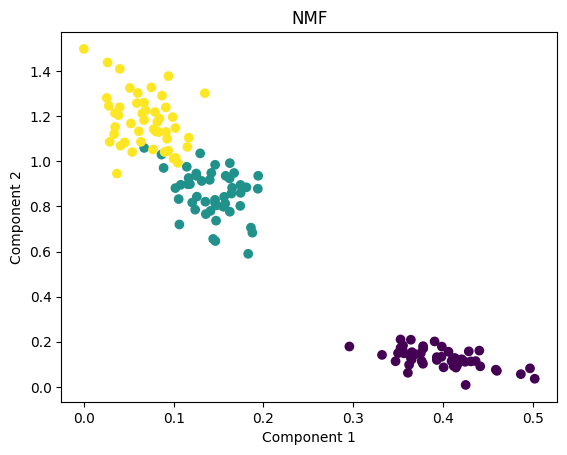

In [32]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris=load_iris()
iris_ftrs=iris.data

nmf=NMF(n_components=2, max_iter=500)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)

plt.scatter(iris_nmf[:,0],iris_nmf[:,1],c=iris.target)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF')
plt.show()

Task3_0731. 와인 품질 데이터셋을 사용하여 Truncated SVD를 통해 차원 축소를 수행하고, 로지스틱 회귀 모델을 학습 및 평가를 수행하세요.(다음 사항 참조)

- 특성 및 레이블 분리: 데이터셋에서 와인의 화학적 특성(X)과 품질 레이블(y)을 분리합니다.
- 레이블 변환: 와인 품질을 범주형 변수로 변환합니다. 구체적으로, 품질 점수가 3-5인 경우 'low', 6인 경우 'medium', 7-8인 경우 'high'로 변환합니다.
- 데이터 정규화: StandardScaler를 사용하여 데이터의 특성을 정규화합니다.
- 차원 축소: TruncatedSVD를 사용하여 데이터의 차원을 5로 축소합니다.
- 데이터 분할: 데이터를 학습용과 테스트용으로 분할합니다.
- 모델 학습: 로지스틱 회귀 모델을 학습합니다.
- 모델 예측 및 평가: 테스트 데이터에 대한 예측을 수행하고, 정확도와 분류 보고서를 출력

In [33]:
import pandas as pd

# 1. 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
